# McKinsey Hackathon

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load and review Data

In [2]:
df=pd.read_csv(r'''C:\Users\kenny\Downloads\McKinsey Dataset\train_ZoGVYWq.csv''', index_col=False)

In [3]:
df.head(5)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


In [4]:
df.shape

(79853, 13)

In [5]:
df.tail(5)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
79848,48057,0.425,23367,224550,1.0,0.0,0.0,98.70,19,B,Urban,13800,1
79849,59012,0.704,19356,279150,1.0,0.0,1.0,99.42,12,A,Rural,28500,1
79850,77050,0.000,23372,305020,0.0,0.0,0.0,98.89,12,A,Rural,9600,1
79851,67225,0.398,22641,39330,0.0,0.0,0.0,98.68,8,A,Rural,5700,1
79852,71531,0.550,15709,280140,1.0,0.0,1.0,99.84,8,A,Urban,9600,0


In [6]:
df.isnull().values.any()

True

In [7]:
df.residence_area_type.value_counts()

Urban    48183
Rural    31670
Name: residence_area_type, dtype: int64

In [8]:
df.sourcing_channel.value_counts()

A    43134
B    16512
C    12039
D     7559
E      609
Name: sourcing_channel, dtype: int64

### Creating Dummy Variables

In [9]:
print("Original Features:\n", list(df.columns), "\n")
df_dummies=pd.get_dummies(df)
print("Features after Dummies:\n", list(df_dummies.columns))

Original Features:
 ['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type', 'premium', 'renewal'] 

Features after Dummies:
 ['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'premium', 'renewal', 'sourcing_channel_A', 'sourcing_channel_B', 'sourcing_channel_C', 'sourcing_channel_D', 'sourcing_channel_E', 'residence_area_type_Rural', 'residence_area_type_Urban']


In [10]:
df_dummies.head(5)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,renewal,sourcing_channel_A,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Rural,residence_area_type_Urban
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,3300,1,0,0,1,0,0,0,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,18000,1,1,0,0,0,0,0,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,3300,0,0,0,1,0,0,1,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,9600,1,1,0,0,0,0,0,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,9600,1,0,1,0,0,0,0,1


In [11]:
df_dummies.isnull().values.any()

True

In [12]:
df_dummies.shape

(79853, 18)

In [13]:
del df_dummies['id']

In [14]:
df_dummies.shape

(79853, 17)

### Checking the Ratio of True to False Cases

In [15]:
num_true=len(df.loc[df_dummies['renewal']==1])
num_false=len(df.loc[df_dummies['renewal']==0])
print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false))*100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false))*100))

Number of True cases: 74855 (93.74%)
Number of False cases: 4998 (6.26%)


### Splitting the Data

In [16]:
from sklearn.model_selection import train_test_split
feature_col_names=['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'premium', 'sourcing_channel_A', 'sourcing_channel_B', 'sourcing_channel_C', 'sourcing_channel_D', 'sourcing_channel_E', 'residence_area_type_Rural', 'residence_area_type_Urban']
predicted_class_names=['renewal']
X=df_dummies[feature_col_names].values     #predictor feature columns(16 X m)
y=df_dummies[predicted_class_names].values #predicted class (1=true, 0=false) column (1 X m)
split_test_size=0.30
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=split_test_size, random_state=42)
                                #test_size=0.3 is 30%, 42 is the answer ro everything

In [17]:
X_test.shape

(23956, 16)

Checking to see if we have the desired split of test and train data

In [18]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df_dummies.index))*100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df_dummies.index))*100))

70.00% in training set
30.00% in test set


In [19]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df_dummies.loc[df_dummies['renewal'] == 1]), (len(df_dummies.loc[df_dummies['renewal'] == 1])/len(df_dummies.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df_dummies.loc[df_dummies['renewal'] == 0]), (len(df_dummies.loc[df_dummies['renewal'] == 0])/len(df_dummies.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 74855 (93.74%)
Original False : 4998 (6.26%)

Training True  : 52440 (93.82%)
Training False : 3457 (6.18%)

Test True      : 22415 (93.57%)
Test False     : 1541 (6.43%)


### Post_Split Data Preparation

#### Hidden Missing Values

#### Imputing missing values with mean

In [20]:
from sklearn.preprocessing import Imputer

#Impute with mean all 0 readings
fill_0 = Imputer(missing_values="NaN", strategy="mean", axis=0)

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [21]:
X_test.shape

(23956, 16)

In [22]:
from sklearn.ensemble import RandomForestClassifier
forest_model=RandomForestClassifier()
forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
forest_predict_train = forest_model.predict(X_train)
from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, forest_predict_train)))

Accuracy: 0.9964


In [24]:
forest_predict_test = forest_model.predict(X_test)
from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, forest_predict_test)))

Accuracy: 0.9327


In [25]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
cm= confusion_matrix(y_test, forest_predict_test)
print("{0}".format(metrics.confusion_matrix(y_test, forest_predict_test)))
print("")

from sklearn.metrics import classification_report
print("Classification Report")
print(metrics.classification_report(y_test, forest_predict_test))

from sklearn.metrics import roc_auc_score
print("Roc_auc_score")
print(metrics.roc_auc_score(y_test, forest_model.predict_proba(X_test)[:, 1]))

Confusion Matrix
[[  290  1251]
 [  361 22054]]

Classification Report
             precision    recall  f1-score   support

          0       0.45      0.19      0.26      1541
          1       0.95      0.98      0.96     22415

avg / total       0.91      0.93      0.92     23956

Roc_auc_score
0.7634934802367528


## Training Algorithm Gradient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier()
gbc_model.fit(X_train, y_train.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

#### Performance on Training Set

In [27]:
gbc_predict_train = gbc_model.predict(X_train)
from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, gbc_predict_train)))

Accuracy: 0.9429


In [28]:
gbc_predict_test = gbc_model.predict(X_test)
from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, gbc_predict_test)))

Accuracy: 0.9380


In [29]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
cm= confusion_matrix(y_test, gbc_predict_test)
print("{0}".format(metrics.confusion_matrix(y_test, gbc_predict_test)))
print("")

from sklearn.metrics import classification_report
print("Classification Report")
print(metrics.classification_report(y_test, gbc_predict_test))

from sklearn.metrics import roc_auc_score
print("Roc_auc_score")
print(metrics.roc_auc_score(y_test, gbc_model.predict_proba(X_test)[:, 1]))


Confusion Matrix
[[  222  1319]
 [  167 22248]]

Classification Report
             precision    recall  f1-score   support

          0       0.57      0.14      0.23      1541
          1       0.94      0.99      0.97     22415

avg / total       0.92      0.94      0.92     23956

Roc_auc_score
0.853413783385008


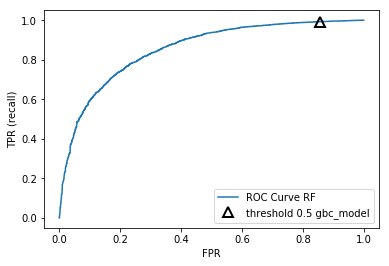

In [30]:
from sklearn.metrics import roc_curve
fpr_gbc_model, tpr_gbc_model, thresholds_gbc_model = roc_curve(y_test, gbc_model.predict_proba(X_test)[:, 1])
plt.plot(fpr_gbc_model, tpr_gbc_model, label="ROC Curve RF")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_default_gbc_model = np.argmin(np.abs(thresholds_gbc_model - 0.5))
plt.plot(fpr_gbc_model[close_default_gbc_model], tpr_gbc_model[close_default_gbc_model], '^', markersize=10,
label="threshold 0.5 gbc_model", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

## Test Data

In [31]:
final=pd.read_csv(r'''C:\Users\kenny\Downloads\McKinsey Dataset\test_66516Ee.csv''')

In [32]:
final.shape

(34224, 12)

In [33]:
final.head(5)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural,3300
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban,11700
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban,11700
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural,5400
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural,9600


In [34]:
final.isnull().values.any()

True

In [35]:
final.sourcing_channel.value_counts()

A    18672
B     6923
C     5146
D     3222
E      261
Name: sourcing_channel, dtype: int64

In [36]:
final.residence_area_type.value_counts()

Urban    20608
Rural    13616
Name: residence_area_type, dtype: int64

In [37]:
print("Original features:\n", list(final.columns), "\n")
test_dummies=pd.get_dummies(final)
print("Features after get_dummies:\n", list(test_dummies.columns))

Original features:
 ['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type', 'premium'] 

Features after get_dummies:
 ['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'premium', 'sourcing_channel_A', 'sourcing_channel_B', 'sourcing_channel_C', 'sourcing_channel_D', 'sourcing_channel_E', 'residence_area_type_Rural', 'residence_area_type_Urban']


In [38]:
del test_dummies['id']

In [39]:
print("Features after get_dummies:\n", list(test_dummies.columns))

Features after get_dummies:
 ['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'premium', 'sourcing_channel_A', 'sourcing_channel_B', 'sourcing_channel_C', 'sourcing_channel_D', 'sourcing_channel_E', 'residence_area_type_Rural', 'residence_area_type_Urban']


In [40]:
test_dummies.shape

(34224, 16)

In [41]:
test_dummies.head(5)

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,sourcing_channel_A,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Rural,residence_area_type_Urban
0,0.001,27384,51150,0.0,0.0,0.0,99.89,7,3300,1,0,0,0,0,1,0
1,0.124,23735,285140,0.0,0.0,0.0,98.93,19,11700,1,0,0,0,0,0,1
2,1.000,17170,186030,0.0,0.0,0.0,NaN,2,11700,0,1,0,0,0,0,1
3,0.198,16068,123540,0.0,0.0,0.0,99.00,11,5400,0,1,0,0,0,1,0
4,0.041,10591,200020,1.0,0.0,0.0,99.17,14,9600,1,0,0,0,0,1,0


In [42]:
test_dummies.shape

(34224, 16)

In [43]:
test_dummies.isnull().values.any()

True

In [44]:
test_dummies.shape

(34224, 16)

In [45]:
predictor_cols=['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'premium', 'sourcing_channel_A', 'sourcing_channel_B', 'sourcing_channel_C', 'sourcing_channel_D', 'sourcing_channel_E', 'residence_area_type_Rural', 'residence_area_type_Urban']
test_dummies=test_dummies[predictor_cols]

In [46]:
test_dummies.shape

(34224, 16)

In [47]:
from sklearn.preprocessing import Imputer

#Impute with mean all 0 readings
fill_0 = Imputer(missing_values="NaN", strategy="mean", axis=0)

test_dummies = fill_0.fit_transform(test_dummies)

In [48]:
test_dummies.shape

(34224, 16)

In [49]:
np.isnan(test_dummies.sum())

False

In [50]:
test_dummies.shape

(34224, 16)

In [51]:
test_dummies.shape

(34224, 16)

In [52]:
predicted_renewal=gbc_model.predict_proba(test_dummies)[:, 1]
print(predicted_renewal)

[0.9893537  0.98369767 0.89036734 ... 0.95652226 0.77110056 0.96599561]


### Submission

In [53]:
my_submission=pd.DataFrame({'id':final.id,'renewal': predicted_renewal})
my_submission.to_csv('McKinsey.csv', index=False)

In [56]:
incentive=pd.read_csv(r'''C:\Users\kenny\Documents\Kaggle\incentive.csv''')